In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [2]:
#Select global values for the normalisation
cut_value = 0.01
min_value = 0.02
max_value = 1.00

# First the features

In [3]:
# Load file for features
image_file_f = h5py.File('C:/Users/simin/Documents/studium/Thesis/images_intrinsic.hdf5','r')

# Get all systems (galaxies) in this file
system_names_f = list(image_file_f.keys())
print(f'System Names = {system_names_f}\n')

# We have 20 systems (system_names)
# Each system has several projections (here 11 or 10), such as: 0deg, 26deg, ...
# Hence, the projection length is either 11 or 10.

# We want to resize all the 11 projections belonging to each of the 20 systems. 
# To this end, we save the images as numpy arrays and resize them to (192, 192).

for i, system in enumerate(system_names_f):
    system_f = image_file_f[system_names_f[i]]
    projection_names_f = list(system_f.keys())
    for j, projection in enumerate(projection_names_f):
        map_names = image_file_f[list(image_file_f.keys())[0]][list(image_file_f[list(image_file_f.keys())[0]].keys())[0]].attrs['Maps']
        nmaps = len(map_names)
        print(f'Resizing System: {system_names_f[i]} --> projection: {projection}\n')
        tempImage_f = np.array(system_f[projection])
        print(type(tempImage_f))
        tempImage_f = cv2.resize(tempImage_f,(192,192),interpolation=cv2.INTER_CUBIC)
        #cv2.imwrite(f'C:\\pic\\{system_names_f[i]}_{projection}.jpg',tempImage_f[:,:,0:4])
        
        
        
        
map_names = image_file_f[list(image_file_f.keys())[0]][list(image_file_f[list(image_file_f.keys())[0]].keys())[0]].attrs['Maps']
nmaps = len(map_names)
X = np.empty((0, 192, 192, nmaps))        

for i, system in enumerate(system_names_f):
    system_f = image_file_f[system_names_f[i]]
    projection_names_f = list(system_f.keys())
    for j, projection in enumerate(projection_names_f):
        full_image_f = np.array(system_f[projection])
        #normierung
        full_image_f = cv2.resize(full_image_f,(192,192),interpolation=cv2.INTER_CUBIC)
        X = np.concatenate([X, full_image_f.reshape(1, 192, 192, nmaps)], axis=0)
        
          
print(X.shape)       
# Choose a system and a projection
sys_num_f  = 10
proj_num_f = 0

# Get all projections of one system
system_f = image_file_f[system_names_f[sys_num_f]]
projection_names_f = list(system_f.keys())
print(f'Projection Names = {projection_names_f}\n')

# Before resizing: full_image ---> After resizing: tempImage 
# Select one projection of this system
projection = projection_names_f[proj_num_f]
print(tempImage_f.shape)
print(system_f[projection].attrs['Npixels'],
      system_f[projection].attrs['Box_min'],
      system_f[projection].attrs['Box_max'],
      system_f[projection].attrs['Maps'])

image_file_f.close()


System Names = ['g1.08e11', 'g1.12e12', 'g1.37e11', 'g1.52e11', 'g1.59e11', 'g1.77e12', 'g1.92e12', 'g2.41e11', 'g2.42e11', 'g2.57e11', 'g2.79e12', 'g3.06e11', 'g3.49e11', 'g5.38e11', 'g6.96e11', 'g7.08e11', 'g7.55e11', 'g7.66e11', 'g8.13e11', 'g8.26e11']

Resizing System: g1.08e11 --> projection: 0deg

<class 'numpy.ndarray'>
Resizing System: g1.08e11 --> projection: 26deg

<class 'numpy.ndarray'>
Resizing System: g1.08e11 --> projection: 37deg

<class 'numpy.ndarray'>
Resizing System: g1.08e11 --> projection: 46deg

<class 'numpy.ndarray'>
Resizing System: g1.08e11 --> projection: 53deg

<class 'numpy.ndarray'>
Resizing System: g1.08e11 --> projection: 60deg

<class 'numpy.ndarray'>
Resizing System: g1.08e11 --> projection: 66deg

<class 'numpy.ndarray'>
Resizing System: g1.08e11 --> projection: 73deg

<class 'numpy.ndarray'>
Resizing System: g1.08e11 --> projection: 78deg

<class 'numpy.ndarray'>
Resizing System: g1.08e11 --> projection: 84deg

<class 'numpy.ndarray'>
Resizing Syste

<class 'numpy.ndarray'>
Resizing System: g3.06e11 --> projection: 46deg

<class 'numpy.ndarray'>
Resizing System: g3.06e11 --> projection: 53deg

<class 'numpy.ndarray'>
Resizing System: g3.06e11 --> projection: 60deg

<class 'numpy.ndarray'>
Resizing System: g3.06e11 --> projection: 66deg

<class 'numpy.ndarray'>
Resizing System: g3.06e11 --> projection: 73deg

<class 'numpy.ndarray'>
Resizing System: g3.06e11 --> projection: 78deg

<class 'numpy.ndarray'>
Resizing System: g3.06e11 --> projection: 84deg

<class 'numpy.ndarray'>
Resizing System: g3.06e11 --> projection: 90deg

<class 'numpy.ndarray'>
Resizing System: g3.49e11 --> projection: 0deg

<class 'numpy.ndarray'>
Resizing System: g3.49e11 --> projection: 26deg

<class 'numpy.ndarray'>
Resizing System: g3.49e11 --> projection: 37deg

<class 'numpy.ndarray'>
Resizing System: g3.49e11 --> projection: 46deg

<class 'numpy.ndarray'>
Resizing System: g3.49e11 --> projection: 53deg

<class 'numpy.ndarray'>
Resizing System: g3.49e11 --

In [4]:
# We have 6 maps including Sigma_stars, Sigma_gas, Sigma_SFR, Mean_age, Mean_metals, and Mean_T. 

# These give the lower and upper cut values for each map
min_feature = np.array([3.2,5.5,-10.0,0.5,-3.5,3.5])
max_feature = np.array([10.0,9.0,-0.5,1.0,-1.5,6.0])

min_feature[3] = 10.**min_feature[3]
max_feature[3] = 10.**max_feature[3]
min_feature[4] = 10.**min_feature[4]
max_feature[4] = 10.**max_feature[4]

<class 'numpy.ndarray'>
float64
(192, 192)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log10
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in less
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in greater


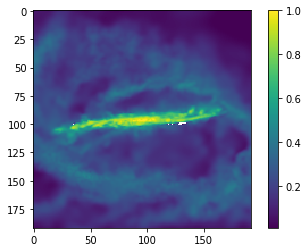

In [5]:
#full_image_f=cv2.resize(full_image_f, (192, 192))
#Select map for plotting
map_nr = 1

plot_image = full_image_f[:,:,map_nr]
print(type(plot_image[:,:]))
print(plot_image.dtype)

# print(map_names[map_nr])
print(plot_image.shape)

# Get log surface density
if (map_nr == 0 or map_nr == 1 or map_nr == 2 or map_nr == 5): plot_image = np.log10(plot_image)

# print(plot_image.min(),plot_image.max())
# print(min_feature[map_nr],max_feature[map_nr])
# max_feature[map_nr] = plot_image[np.isfinite(plot_image)].max()
# min_feature[map_nr] = plot_image[np.isfinite(plot_image)].min()
# max_feature[map_nr] = 5.0
# min_feature[map_nr] = 12.0

# Normalise
plot_image = (plot_image - min_feature[map_nr]) / (max_feature[map_nr] - min_feature[map_nr]) * (max_value - min_value)
plot_image[plot_image < cut_value] = cut_value
plot_image[plot_image > max_value] = max_value

plt.imshow(plot_image)
plt.colorbar()
plt.show()

In [6]:
# Load file
image_file_f = h5py.File('C:/Users/simin/Documents/studium/Thesis/images_intrinsic.hdf5','r')

# Get all systems (galaxies) in this file
system_names_f = list(image_file_f.keys())

map_names = image_file_f[list(image_file_f.keys())[0]][list(image_file_f[list(image_file_f.keys())[0]].keys())[0]].attrs['Maps']
nmaps = len(map_names)

maxima = np.empty((0,6))
minima = np.empty((0,6))

for system_name in system_names_f:
    system_f = image_file_f[system_name]
    projection_names_f = list(system_f.keys())

    for projection_name in projection_names_f:   
        full_image_f = np.array(system_f[projection_name])
        mapmax = np.max(np.max(np.where(full_image_f==0, full_image_f.min(), full_image_f),axis=0),axis=0)
        mapmin = np.min(np.min(np.where(full_image_f==0, full_image_f.max(), full_image_f),axis=0),axis=0)
        maxima = np.concatenate((maxima,mapmax.reshape(-1,mapmax.size)),axis=0)
        minima = np.concatenate((minima,mapmin.reshape(-1,mapmin.size)),axis=0)

maxmax = np.max(np.where(maxima==0, maxima.min(), maxima), axis=0)
maxmin = np.max(np.where(minima==0, minima.min(), minima), axis=0)
minmax = np.min(np.where(maxima==0, maxima.max(), maxima), axis=0)
minmin = np.min(np.where(minima==0, minima.max(), minima), axis=0)
median_max = np.median(maxima, axis=0)
median_min = np.median(minima, axis=0)

for i in range(nmaps):
    print('{:15s} min = {:6.2f} ({:6.2f} to {:6.2f} )     max = {:6.2f} ({:6.2f} to {:6.2f} )'.format(map_names[i],np.log10(median_min[i]),np.log10(minmin[i]),np.log10(maxmin[i]),np.log10(median_max[i]),np.log10(minmax[i]),np.log10(maxmax[i])))
        
image_file_f.close()

Sigma_stars     min =   3.20 ( -1.48 to   4.12 )     max =   9.81 (  6.80 to  11.04 )
Sigma_gas       min =   5.43 (  4.93 to   5.91 )     max =   8.87 (  8.27 to   9.76 )
Sigma_SFR       min = -15.77 (-18.67 to   8.99 )     max =  -0.74 ( -2.04 to   1.01 )
Mean_age        min =   0.59 (  0.08 to   0.82 )     max =   1.07 (  0.97 to   1.13 )
Mean_metals     min =  -3.42 ( -4.38 to  -2.53 )     max =  -1.71 ( -2.72 to  -1.31 )
Mean_T          min =   3.46 (  2.91 to   5.04 )     max =   6.00 (  5.07 to   6.75 )












# And now the labels

In [7]:
max_label = -4.0
min_label = -10.0

In [8]:
# Load file for labels
image_file_l = h5py.File('C:/Users/simin/Documents/studium/Thesis/images_withdust.hdf5','r')

# Get all systems (galaxies) in this file
system_names_l = list(image_file_l.keys())
print(f'System Names = {system_names_l}\n')


# Similar to what we did for the features:
for i, system in enumerate(system_names_l):
    system_l = image_file_l[system_names_l[i]]
    projection_names_l = list(system_l.keys())
  #  print('projection length for this system: ', len(projection_names_l))
    for j, projection_l in enumerate(projection_names_l):
        filter_names = image_file_l[list(image_file_l.keys())[0]][list(image_file_l[list(image_file_l.keys())[0]].keys())[0]].attrs['Filters']
        nfilter = len(filter_names)
    #for projection_l in projection_names_l:
        print(f'Resizing System: {system_names_l[i]} --> projection: {projection}\n')
        tempImage_l = np.array(system_l[projection])
        print(type(tempImage_l))
        tempImage_l = cv2.resize(tempImage_l,(192,192),interpolation=cv2.INTER_CUBIC)
        #cv2.imwrite(f'C:\\pic\\{system_names_l[i]}_{projection}.jpg',tempImage_l[:,:,0:4])
        

filter_names = image_file_l[list(image_file_l.keys())[0]][list(image_file_l[list(image_file_l.keys())[0]].keys())[0]].attrs['Filters']
nfilter = len(filter_names)        
y = np.empty((0, 192, 192, nfilter))


#c_l = np.empty((4, 0),dtype=np.int)
#counter_l = 0
for i, system in enumerate(system_names_l):
    system_l = image_file_l[system_names_l[i]]
    projection_names_l = list(system_l.keys())
    for j, projection_l in enumerate(projection_names_l):
        full_image_l = np.array(system_l[projection])
        full_image_l = cv2.resize(full_image_l, (192,192), interpolation=cv2.INTER_CUBIC)
        y = np.concatenate([y, full_image_l.reshape(1, 192, 192, nfilter)], axis=0)
        

#print(f'c is :\n{c_l}')
#print(c_l.shape)    
print(y.shape)

# Choose a system and a projection
sys_num_l  = 17
proj_num_l = 5

# Get all projections of one system
system_l = image_file_l[system_names_l[sys_num_l]]
projection_names_l = list(system_l.keys())
print(f'Projection Names = {projection_names_l}\n')


# Select one projection of this system
projection_l = projection_names_l[proj_num_l]
#full_image_l = np.array(system_l[projection_l])
print(tempImage_l.shape)
print(system_l[projection_l].attrs['Npixels'],
      system_l[projection_l].attrs['Box_min'],
      system_l[projection_l].attrs['Box_max'],
      system_l[projection_l].attrs['Filters'])

image_file_l.close()



System Names = ['g1.08e11', 'g1.12e12', 'g1.37e11', 'g1.52e11', 'g1.59e11', 'g1.77e12', 'g1.92e12', 'g2.41e11', 'g2.42e11', 'g2.57e11', 'g2.79e12', 'g3.06e11', 'g3.49e11', 'g5.38e11', 'g6.96e11', 'g7.08e11', 'g7.55e11', 'g7.66e11', 'g8.13e11', 'g8.26e11']

Resizing System: g1.08e11 --> projection: 0deg

<class 'numpy.ndarray'>
Resizing System: g1.08e11 --> projection: 0deg

<class 'numpy.ndarray'>
Resizing System: g1.08e11 --> projection: 0deg

<class 'numpy.ndarray'>
Resizing System: g1.08e11 --> projection: 0deg

<class 'numpy.ndarray'>
Resizing System: g1.08e11 --> projection: 0deg

<class 'numpy.ndarray'>
Resizing System: g1.08e11 --> projection: 0deg

<class 'numpy.ndarray'>
Resizing System: g1.08e11 --> projection: 0deg

<class 'numpy.ndarray'>
Resizing System: g1.08e11 --> projection: 0deg

<class 'numpy.ndarray'>
Resizing System: g1.08e11 --> projection: 0deg

<class 'numpy.ndarray'>
Resizing System: g1.08e11 --> projection: 0deg

<class 'numpy.ndarray'>
Resizing System: g1.08e

<class 'numpy.ndarray'>
Resizing System: g5.38e11 --> projection: 0deg

<class 'numpy.ndarray'>
Resizing System: g5.38e11 --> projection: 0deg

<class 'numpy.ndarray'>
Resizing System: g5.38e11 --> projection: 0deg

<class 'numpy.ndarray'>
Resizing System: g5.38e11 --> projection: 0deg

<class 'numpy.ndarray'>
Resizing System: g6.96e11 --> projection: 0deg

<class 'numpy.ndarray'>
Resizing System: g6.96e11 --> projection: 0deg

<class 'numpy.ndarray'>
Resizing System: g6.96e11 --> projection: 0deg

<class 'numpy.ndarray'>
Resizing System: g6.96e11 --> projection: 0deg

<class 'numpy.ndarray'>
Resizing System: g6.96e11 --> projection: 0deg

<class 'numpy.ndarray'>
Resizing System: g6.96e11 --> projection: 0deg

<class 'numpy.ndarray'>
Resizing System: g6.96e11 --> projection: 0deg

<class 'numpy.ndarray'>
Resizing System: g6.96e11 --> projection: 0deg

<class 'numpy.ndarray'>
Resizing System: g6.96e11 --> projection: 0deg

<class 'numpy.ndarray'>
Resizing System: g6.96e11 --> projection

(192, 192, 3)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log10
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in less
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app


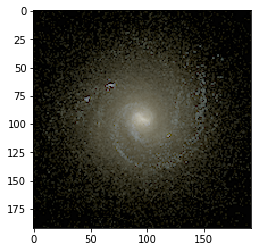

  min: nan   max: nan


In [9]:
# In the labels, we have 5 filters including u, g, r, i, and z.
# Select 3 bands for plotting
#full_image_l=cv2.resize(full_image_l, (192, 192))
plot_image = full_image_l[:,:,[2,1,0]]
for i in range(plot_image.shape[-1]):   
    plot_image[:,:,i] = plot_image[:,:,i].T
print(plot_image.shape)

# Get log surface density
plot_image = np.log10(plot_image)

#Normalise
plot_image = (plot_image - min_label) / (max_label - min_label) * (max_value - min_value)
plot_image[plot_image < cut_value] = cut_value
plot_image[plot_image > max_value] = max_value

plt.imshow(plot_image)
plt.show()

print('  min:', plot_image.min(), '  max:', plot_image.max())

# building U-Net Model

In [10]:
import tensorflow as tf
width = 192
height = 192
channels = 6

In [11]:
inputs = tf.keras.layers.Input((width, height, channels))

In [12]:
s = tf.keras.layers.Lambda(lambda x: x/255)(inputs)

# Encoding path

c1 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPool2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPool2D((2, 2))(c2)

c3 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPool2D((2, 2))(c3)

c4 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(c4)

#c5 = tf.keras.layers.Conv2D(256, (6, 6), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
#c5 = tf.keras.layers.Dropout(0.3)(c5)
#c5 = tf.keras.layers.Conv2D(256, (6, 6), activation='relu', kernel_initializer='he_normal', padding='same')(c5)


In [13]:
# Decoding path

u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(1, 1), padding='same')(c4)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

u9 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1])
c9 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

In [14]:
outputs = tf.keras.layers.Conv2D(5, (3,3), activation='sigmoid', padding='same')(c9)

In [15]:
print('Inputs shape: ', inputs.shape)
print('Output shape: ', outputs.shape)

Inputs shape:  (None, 192, 192, 6)
Output shape:  (None, 192, 192, 5)


In [16]:
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='MSE', metrics=['accuracy'])
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 192, 192, 6) 0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 192, 192, 6)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 192, 192, 32) 1760        lambda[0][0]                     
__________________________________________________________________________________________________
dropout (Dropout)               (None, 192, 192, 32) 0           conv2d[0][0]                     
_______________________________________________________________________________________

In [17]:
checkpointer = tf.keras.callbacks.ModelCheckpoint('model.h5', verbose = 1, save_best_only=True)
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
    tf.keras.callbacks.TensorBoard(log_dir='logs')
]

In [18]:
results = model.fit(X,y, validation_split=0.2, batch_size=16, epochs=25, callbacks=callbacks)

Epoch 1/25
 1/11 [=>............................] - ETA: 0s - loss: 0.7253 - accuracy: 0.1594WARNING:tensorflow:From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
11/11 [==============================] - 46s 4s/step - loss: 0.2652 - accuracy: 0.3589 - val_loss: 0.1275 - val_accuracy: 0.3742
Epoch 2/25
11/11 [==============================] - 46s 4s/step - loss: 0.0477 - accuracy: 0.1869 - val_loss: 2.3428e-06 - val_accuracy: 0.2032
Epoch 3/25
11/11 [==============================] - 47s 4s/step - loss: 1.6211e-04 - accuracy: 0.1206 - val_loss: 5.4253e-06 - val_accuracy: 0.2032
Epoch 4/25
11/11 [==============================] - 47s 4s/step - loss: 1.6059e-05 - accuracy: 0.1206 - val_loss: 5.4253e-06 - val_accuracy: 0.2032
